### Importing dependencies

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2    # this is open cv library
from PIL import Image   # pillow library
import tensorflow as tf
tf.random.set_seed(3)   # it is just like random state to get same value repeatedly
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [8]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [15]:
# shape of array

print(x_train.shape)

print(y_train.shape)

print(x_test.shape)

print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [17]:
# in training data we have 60000 images that of 28x28 pixel and respective label data

# in testing data we have 10000 images that of 28x28 pixel and respective label data

# these images already grayscale so need to do any transformation

In [18]:
print(x_train[30])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  11  19  95 143 143 143 143 143 143 143 143  33   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  90 149 208 253 253 253 253 253 253 253 253 253 25

In [20]:
print(x_train[30].shape)

(28, 28)


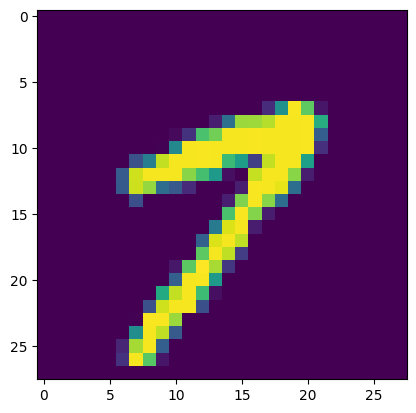

7


In [23]:
# let visualize the image

plt.imshow(x_train[79])
plt.show()

print(y_train[79])

In [24]:
# Image labels

print(y_train.shape , y_test.shape)

(60000,) (10000,)


In [26]:
# let cheque unique values in the label data

#unique values in  y_train
print(np.unique(y_train))

#unique value in y test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [27]:
# Note : All the images are already in the same dimension so dont need to resize it

In [28]:
# scaling the values

x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [32]:
x_train_scaled[10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Building the neural network

In [35]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [37]:
# compiling the neural network

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
# training the neural network

model.fit(x_train_scaled,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3022 - accuracy: 0.9126
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1437 - accuracy: 0.9577
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1070 - accuracy: 0.9672
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0863 - accuracy: 0.9736
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0715 - accuracy: 0.9778
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0609 - accuracy: 0.9804
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0539 - accuracy: 0.9832
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0476 - accuracy: 0.9844
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0404 - accuracy: 0.9863
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.036

In [40]:
# training data accuracy==98.80%

In [43]:
loss, accuracy=model.evaluate(x_test_scaled,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1053 - accuracy: 0.9698


In [44]:
print(accuracy)

0.9697999954223633


In [45]:
# test data accuracy==> 96.97%

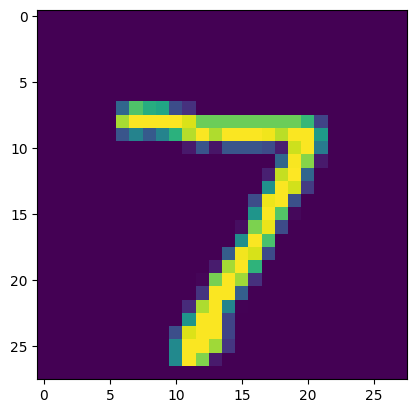

In [46]:
plt.imshow(x_test_scaled[0])

In [47]:
print(y_test[0])

7


In [48]:
y_pred=model.predict(x_test_scaled)

313/313 [==============================] - 1s 2ms/step


In [50]:
print(y_pred[0])

[3.1146221e-03 3.6067909e-04 5.0705791e-01 5.6062889e-01 4.5063315e-04
 8.2846694e-03 2.7025223e-07 9.9999952e-01 4.7751835e-01 1.1366478e-01]


In [51]:
# each number is prediction probability of each class for that perticular point

In [52]:
#converting prediction probabilities into labelled class

In [54]:
label_for_first_image=np.argmax(y_pred[0])

print(label_for_first_image)

7


In [55]:
y_pred_labels=[np.argmax(i) for i in y_pred]

In [56]:
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 5, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 3, 5, 9, 7, 9, 3, 4, 4, 2, 0, 7, 1, 1, 2, 1, 

y_test ---> Actual labels

y_pred_labels --> predicted labels

In [58]:
# build confusion matrix

conf_matrix=confusion_matrix(y_test,y_pred_labels)

In [59]:
print(conf_matrix)

tf.Tensor(
[[ 958    0    2    4    3    3    4    2    3    1]
 [   0 1125    2    1    0    1    3    0    3    0]
 [   4    4  985    8    7    3    7    6    8    0]
 [   0    1    1  990    0    7    0    5    3    3]
 [   0    1    4    1  964    2    3    1    1    5]
 [   1    0    0   18    1  866    2    0    4    0]
 [   4    2    1    2    6   10  932    0    1    0]
 [   1    6   12    7    3    0    0  987    1   11]
 [   1    3    2   12    5   11    2    2  933    3]
 [   1    2    0    9   24    9    1    2    4  957]], shape=(10, 10), dtype=int32)


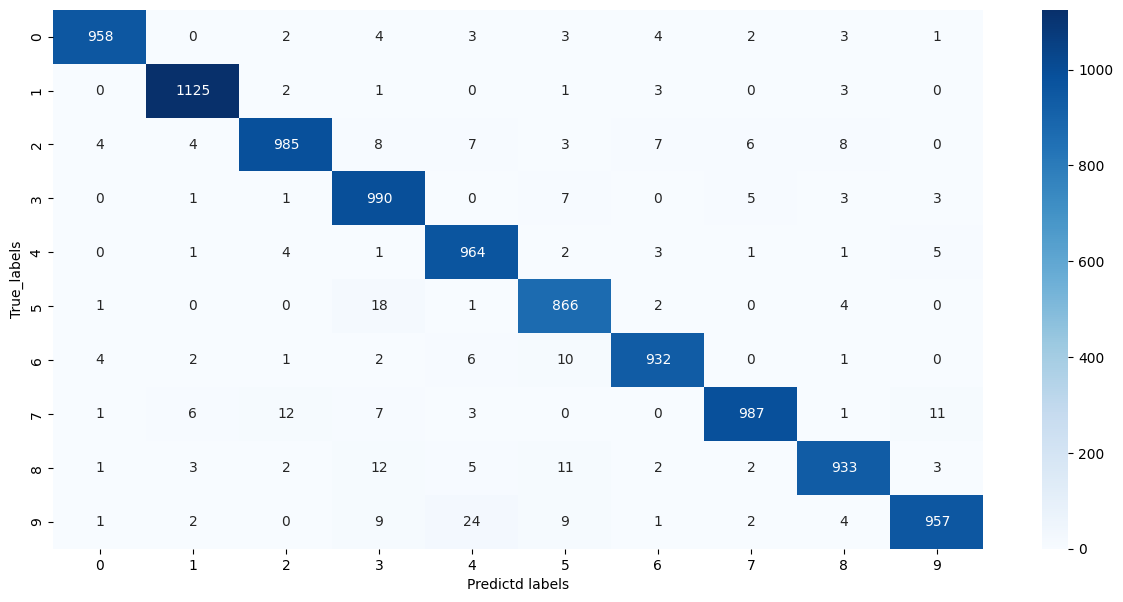

In [63]:
# will try to visualize in heatmap

plt.figure(figsize=(15,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True_labels')
plt.xlabel('Predictd labels')
plt.show()

In [65]:
### Build predictive system

input_image=cv2.imread('MicrosoftTeams-image.png')

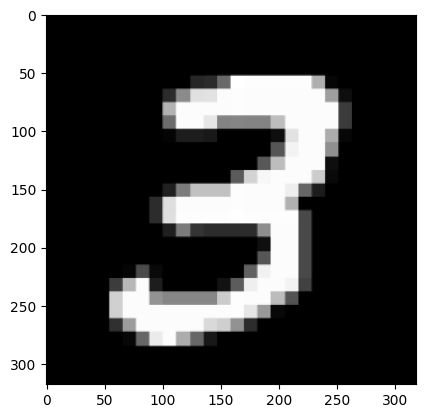

In [68]:
plt.imshow(input_image)

In [69]:
input_image.shape

(318, 318, 3)

In [70]:
# so it is RGB image with dimension size    

In [72]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [73]:
grayscale.shape

(318, 318)

In [74]:
# we need to resize the images

In [76]:
input_resized_image=cv2.resize(grayscale,(28,28))

In [77]:
input_resized_image.shape

(28, 28)

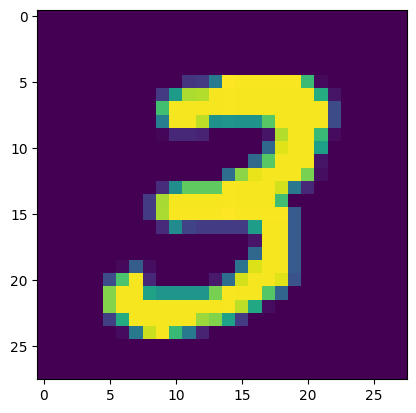

In [79]:
plt.imshow(input_resized_image)

In [80]:
# need to scale input

input_image_scaled=input_resized_image/255

In [82]:
# reshaping the image

image_reshaped=np.reshape(input_image_scaled,[1,28,28])

In [83]:
prediction=model.predict(image_reshaped)

1/1 [==============================] - 0s 43ms/step


In [84]:
print(prediction)

[[6.0467744e-07 1.7436899e-01 1.2721750e-02 1.0000000e+00 4.0951265e-15
  5.0871873e-01 3.0081970e-12 1.5049590e-02 8.1084543e-01 2.8690198e-01]]


In [85]:
input_pred_label=np.argmax(prediction)

print(input_pred_label)

3


### Build predictive system

1/1 [==============================] - 0s 35ms/step
Handwritten image is recognized as:  3


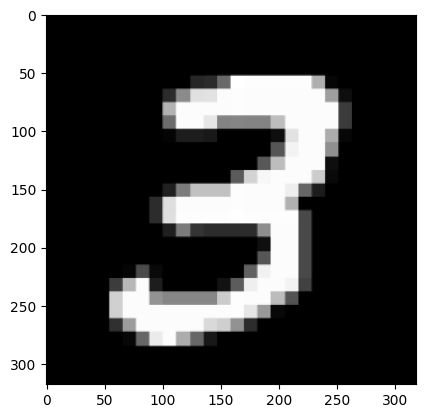

In [87]:
input_image=cv2.imread('MicrosoftTeams-image.png')

plt.imshow(input_image)

grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

input_resized_image=cv2.resize(grayscale,(28,28))

# need to scale input

input_image_scaled=input_resized_image/255

# reshaping the image

image_reshaped=np.reshape(input_image_scaled,[1,28,28])

prediction=model.predict(image_reshaped)

input_pred_label=np.argmax(prediction)

print('Handwritten image is recognized as: ',input_pred_label)